In [2]:
import pandas as pd
import numpy as np 


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [3]:
import sqlite3 


conn = sqlite3.Connection('data/movies.db')
cur = conn.cursor()

In [31]:
df1= pd.read_csv("cln3_tn.movie_budgets.csv")
df1

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_as_percentage
0,0,0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713
1,1,1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286
2,2,2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757
3,3,3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139
4,4,4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.369636
...,...,...,...,...,...,...,...,...,...,...,...
5227,5228,5775,5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644,923.485714
5228,5229,5776,5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,-6100,-87.142857
5229,5230,5778,5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,3908.250000
5230,5231,5779,5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,-73.240000


In [45]:
df2= pd.read_csv('data/cln_imdb_title_basics.csv')
df2.head()

,Unnamed: 0,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,90.0,"Comedy,Drama"
4,4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [32]:
df1 = df1.set_index("movie")


In [33]:
df2 = df2.set_index('primary_title')


In [10]:
print(df2.isnull().sum())

tconst                 0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [42]:
df2.drop('Unnamed: 0', axis = 1, inplace = True)

In [43]:
df1.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1, inplace = True)

In [44]:
df3=df2.join(df1,on = "primary_title", how= "inner")
df3

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0.1.1,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_as_percentage
33,33,tt0293429,Mortal Kombat,Mortal Kombat,2021,90.0,"Action,Adventure,Fantasy",2509,10,"Aug 18, 1995",20000000,70433227,122133227,102133227,510.666135
40,40,tt0326592,The Overnight,The Overnight,2010,88.0,None,5620,21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000
67603,67603,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",5620,21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000
48,48,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",2316,17,"Mar 22, 2013",25000000,720828,9313302,-15686698,-62.746792
39490,39490,tt2404548,On the Road,On the Road,2011,90.0,Drama,2316,17,"Mar 22, 2013",25000000,720828,9313302,-15686698,-62.746792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143930,143930,tt9607270,The Blue Bird,The Blue Bird,2015,84.0,Drama,5170,71,"Jan 1, 1976",1200000,887000,887000,-313000,-26.083333
144552,144552,tt9678962,Fuel,Fuel,2018,90.0,"Documentary,Sport",4834,35,"Nov 14, 2008",2500000,174255,174255,-2325745,-93.029800
144854,144854,tt9729206,Diner,Diner,2019,90.0,Crime,4310,11,"Apr 2, 1982",5000000,12592907,12592907,7592907,151.858140
145342,145342,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",2424,25,"Aug 27, 2008",22000000,23530831,27882226,5882226,26.737391


In [35]:
df3.sort_values("profit_as_percentage", ascending = False).head(25)

,tconst,original_title,start_year,runtime_minutes,genres,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_as_percentage
primary_title,,,,,,,,,,,,,,,
The Gallows,tt2309260,The Gallows,2015,81.0,"Horror,Mystery,Thriller",5171,5679,5679,80,"Jul 10, 2015",100000,22764410,41656474,41556474,41556.474000
Bambi,tt2668120,Bambi,2013,58.0,"Biography,Documentary",4942,5346,5346,47,"Aug 13, 1942",858000,102797000,268000000,267142000,31135.431235
Night of the Living Dead,tt3393372,Night of the Living Dead,2014,79.0,Horror,5168,5676,5676,77,"Oct 1, 1968",114000,12087064,30087064,29973064,26292.161404
Rocky,tt3080284,Rocky,2013,136.0,"Action,Comedy,Drama",4840,5210,5210,11,"Nov 21, 1976",1000000,117235147,225000000,224000000,22400.000000
Rocky,tt9430578,Rocky,2019,NaN,"Action,Drama,Romance",4840,5210,5210,11,"Nov 21, 1976",1000000,117235147,225000000,224000000,22400.000000
Halloween,tt1502407,Halloween,2018,106.0,"Horror,Thriller",5074,5536,5536,37,"Oct 17, 1978",325000,47000000,70000000,69675000,21438.461538
Snow White and the Seven Dwarfs,tt7821084,Snow White and the Seven Dwarfs,2017,49.0,"Animation,Family",4773,5117,5117,18,"Dec 21, 1937",1488000,184925486,184925486,183437486,12327.788038
Snow White and the Seven Dwarfs,tt9691476,Snow White and the Seven Dwarfs,2016,NaN,"Comedy,Drama,Fantasy",4773,5117,5117,18,"Dec 21, 1937",1488000,184925486,184925486,183437486,12327.788038
The Devil Inside,tt1560985,The Devil Inside,2012,83.0,Horror,4841,5211,5211,12,"Jan 6, 2012",1000000,53262945,101759490,100759490,10075.949000


In [46]:
profit_as_percentage = df3["profit_as_percentage"]

In [47]:
genres = df3["genres"]

In [48]:
profit = df3['profit']

In [49]:
runtime_minutes = df3["runtime_minutes"]

In [50]:
correlation = profit_as_percentage.corr(runtime_minutes)
print(correlation)

-0.058269353667834825


# No correlation between profit % and Runtime 

In [19]:
correlation = runtime_minutes.corr(profit)
print(correlation)

0.133703213785429


In [91]:
df.to_csv(path_or_buf="movie_budgets_and_title_basics.csv")

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [22]:
#data = pd.read_csv('data/movie_budgets_and_title_basics.csv')
#x = df3["profit"]
#y = df3['runtime_minutes']

#print(np.corrcoef(x, y))

#plt.scatter(x, y) 
#plt.title('Correlation between runtime and profit')
#plt.xlabel('runtime_minutes')
#plt.ylabel('profit')
#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')
#plt.show()

[[1.         0.16217352]
 [0.16217352 1.        ]]


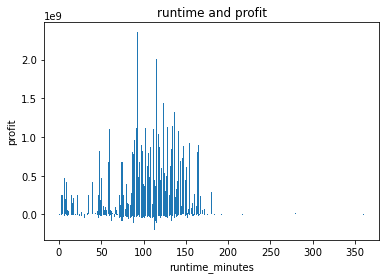

In [93]:
data = pd.read_csv('movie_budgets_and_title_basics.csv')
y = df3["profit"]
x = df3['runtime_minutes']

print(np.corrcoef(x, y))

plt.bar(x, y) 
plt.title('runtime and profit')
plt.xlabel('runtime_minutes')
plt.ylabel('profit')

plt.show()

# Highest profit is at 90 minutes and 120 minutes

In [52]:
df4 = df3.groupby ("genres")["profit_as_percentage"].mean()
df4

genres
Action                        167.547170
Action,Adventure              358.139374
Action,Adventure,Animation    310.098117
Action,Adventure,Biography    147.584996
Action,Adventure,Comedy       301.540550
                                 ...    
Sci-Fi,Thriller               312.259323
Sport                         -35.016841
Thriller                      318.876397
War                           230.013121
Western                        46.501758
Name: profit_as_percentage, Length: 326, dtype: float64

In [53]:
df4.sort_values( ascending = False).head(10)


genres
Animation,Family           12327.788038
Drama,Family,Fantasy        4726.022386
Action,History,War          4527.777529
Animation,Documentary       3366.441499
Action,Comedy,Drama         3333.782461
Comedy,Drama,Fantasy        3195.555800
Biography,Documentary       2701.134322
Horror,Romance,Thriller     2617.924114
Musical                     2471.196918
Action,Drama,Romance        2367.289443
Name: profit_as_percentage, dtype: float64

In [57]:
df3["unique_genres"] = df3["genres"].map(lambda x: x.split(','))
df3

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0.1.1,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_as_percentage,unique_genres
33,33,tt0293429,Mortal Kombat,Mortal Kombat,2021,90.0,"Action,Adventure,Fantasy",2509,10,"Aug 18, 1995",20000000,70433227,122133227,102133227,510.666135,"[Action, Adventure, Fantasy]"
40,40,tt0326592,The Overnight,The Overnight,2010,88.0,None,5620,21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000,[None]
67603,67603,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",5620,21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000,"[Comedy, Mystery]"
48,48,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",2316,17,"Mar 22, 2013",25000000,720828,9313302,-15686698,-62.746792,"[Adventure, Drama, Romance]"
39490,39490,tt2404548,On the Road,On the Road,2011,90.0,Drama,2316,17,"Mar 22, 2013",25000000,720828,9313302,-15686698,-62.746792,[Drama]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143930,143930,tt9607270,The Blue Bird,The Blue Bird,2015,84.0,Drama,5170,71,"Jan 1, 1976",1200000,887000,887000,-313000,-26.083333,[Drama]
144552,144552,tt9678962,Fuel,Fuel,2018,90.0,"Documentary,Sport",4834,35,"Nov 14, 2008",2500000,174255,174255,-2325745,-93.029800,"[Documentary, Sport]"
144854,144854,tt9729206,Diner,Diner,2019,90.0,Crime,4310,11,"Apr 2, 1982",5000000,12592907,12592907,7592907,151.858140,[Crime]
145342,145342,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",2424,25,"Aug 27, 2008",22000000,23530831,27882226,5882226,26.737391,"[Action, Drama, Romance]"


In [60]:
df3 = df3.explode("unique_genres")
    
df3.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0.1.1,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_as_percentage,unique_genres
33,33,tt0293429,Mortal Kombat,Mortal Kombat,2021,90.0,"Action,Adventure,Fantasy",2509,10,"Aug 18, 1995",20000000,70433227,122133227,102133227,510.666135,Action
33,33,tt0293429,Mortal Kombat,Mortal Kombat,2021,90.0,"Action,Adventure,Fantasy",2509,10,"Aug 18, 1995",20000000,70433227,122133227,102133227,510.666135,Adventure
33,33,tt0293429,Mortal Kombat,Mortal Kombat,2021,90.0,"Action,Adventure,Fantasy",2509,10,"Aug 18, 1995",20000000,70433227,122133227,102133227,510.666135,Fantasy
40,40,tt0326592,The Overnight,The Overnight,2010,88.0,None,5620,21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000,None
67603,67603,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",5620,21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000,Comedy


In [138]:
df4 = df3.groupby ("unique_genres")["profit_as_percentage"].median()
df4

unique_genres
Action         109.847075
Adventure      161.124261
Animation      199.854564
Biography       74.016666
Comedy         119.199703
Crime           53.753771
Documentary     55.890618
Drama           61.102523
Family         116.706643
Fantasy        126.830094
History         58.119927
Horror         162.551316
Music          128.700183
Musical        323.950800
Mystery        147.566740
News            35.849094
None            53.551908
Romance        114.819901
Sci-Fi         145.944250
Sport           37.359138
Thriller        82.050733
War             38.021009
Western         -6.503600
Name: profit_as_percentage, dtype: float64

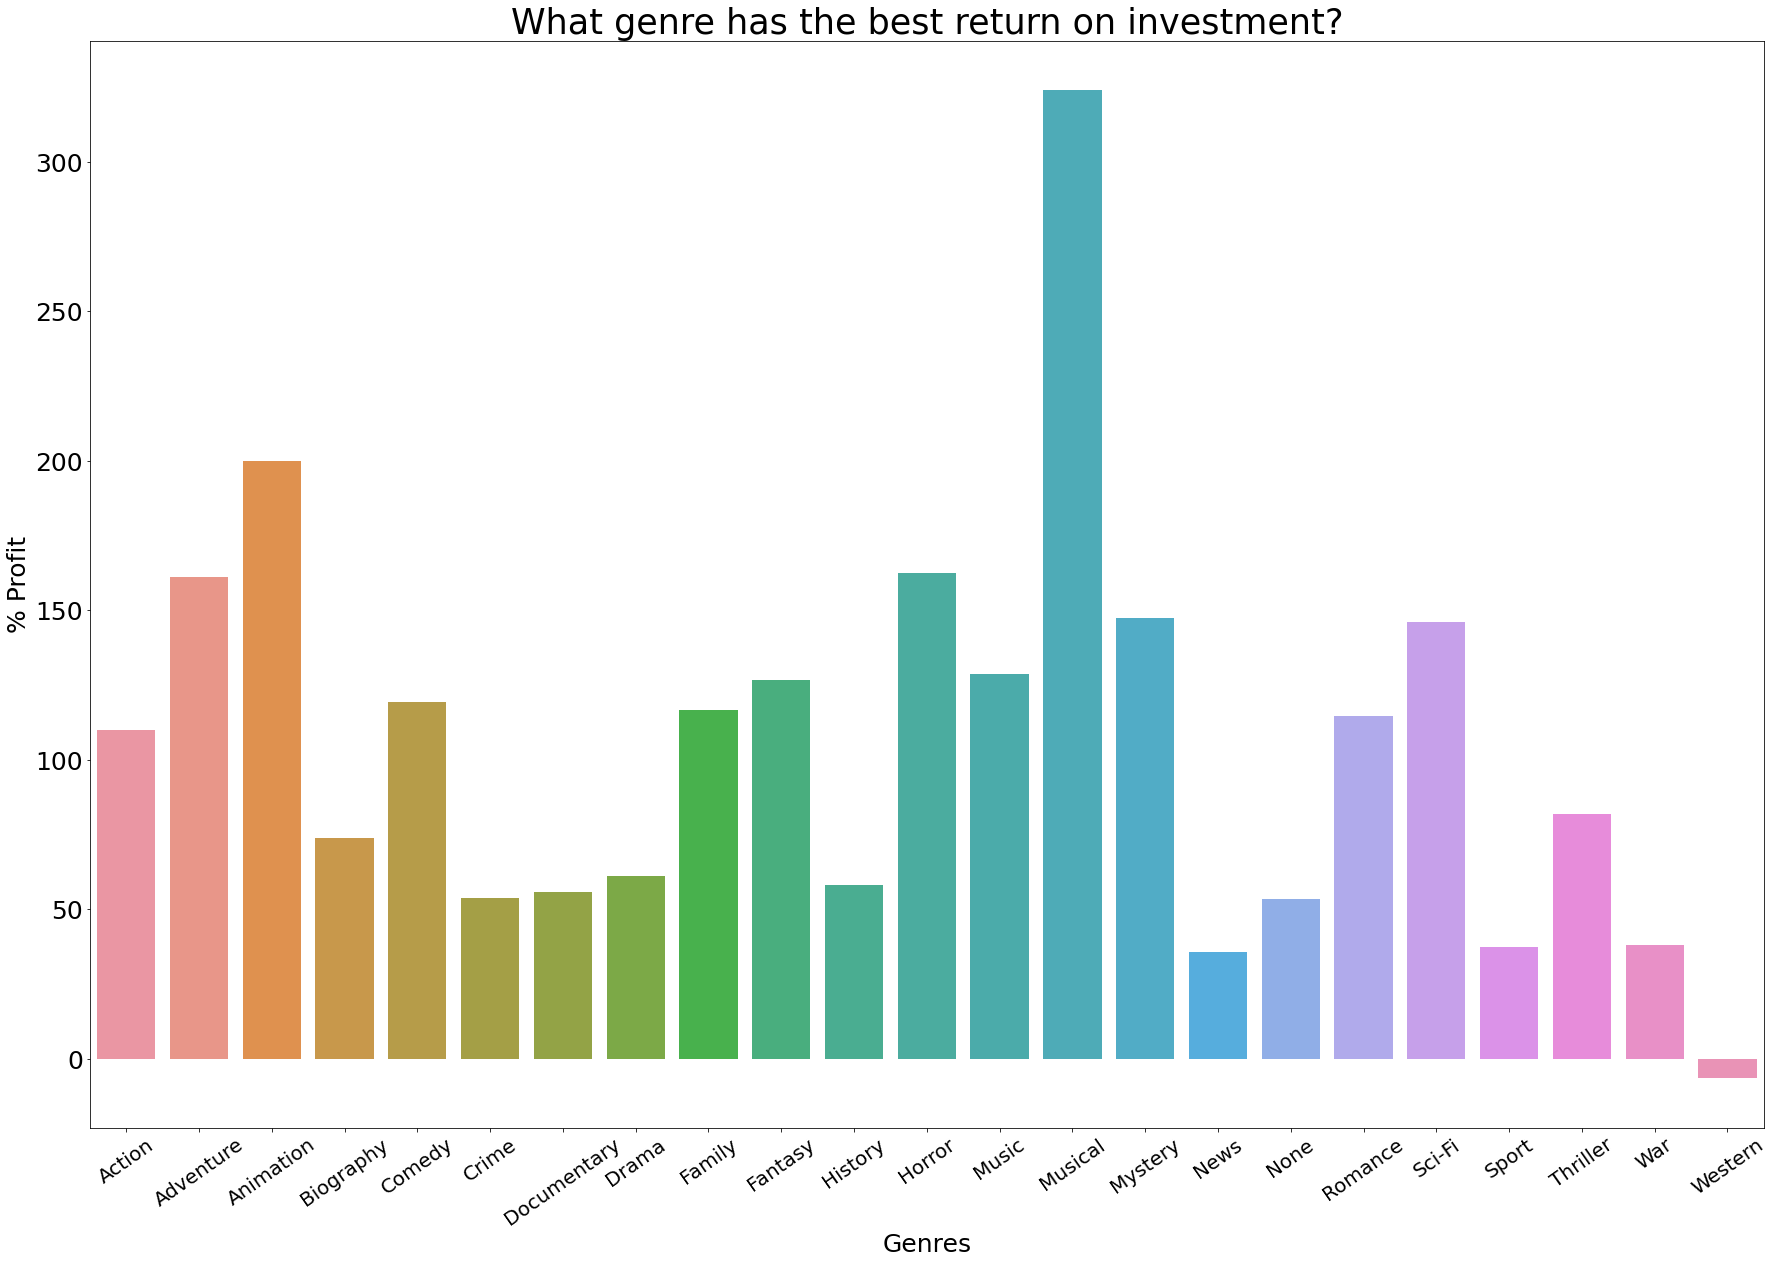

In [139]:
fig, ax =plt.subplots(figsize = (30,20))
ax = sns.barplot(x=df4.index, y=df4.values)
plt.title("What genre has the best return on investment?", fontsize = 35)
plt.ylabel("% Profit", fontsize = 25) 
plt.xlabel("Genres", fontsize = 25)

ax.tick_params(axis = 'y', labelsize = 25)
ax.set_xticklabels(list(df4.index), fontsize = 20, rotation = 35);


In [110]:
df5 = df3.groupby ("runtime_minutes")["profit_as_percentage"].mean()

idx                     0
tconst                  0
primary_title           0
original_title          0
start_year              0
runtime_minutes         0
genres                  0
Unnamed: 0.1.1          0
id                      0
release_date            0
production_budget       0
domestic_gross          0
worldwide_gross         0
profit                  0
profit_as_percentage    0
unique_genres           0
dtype: int64

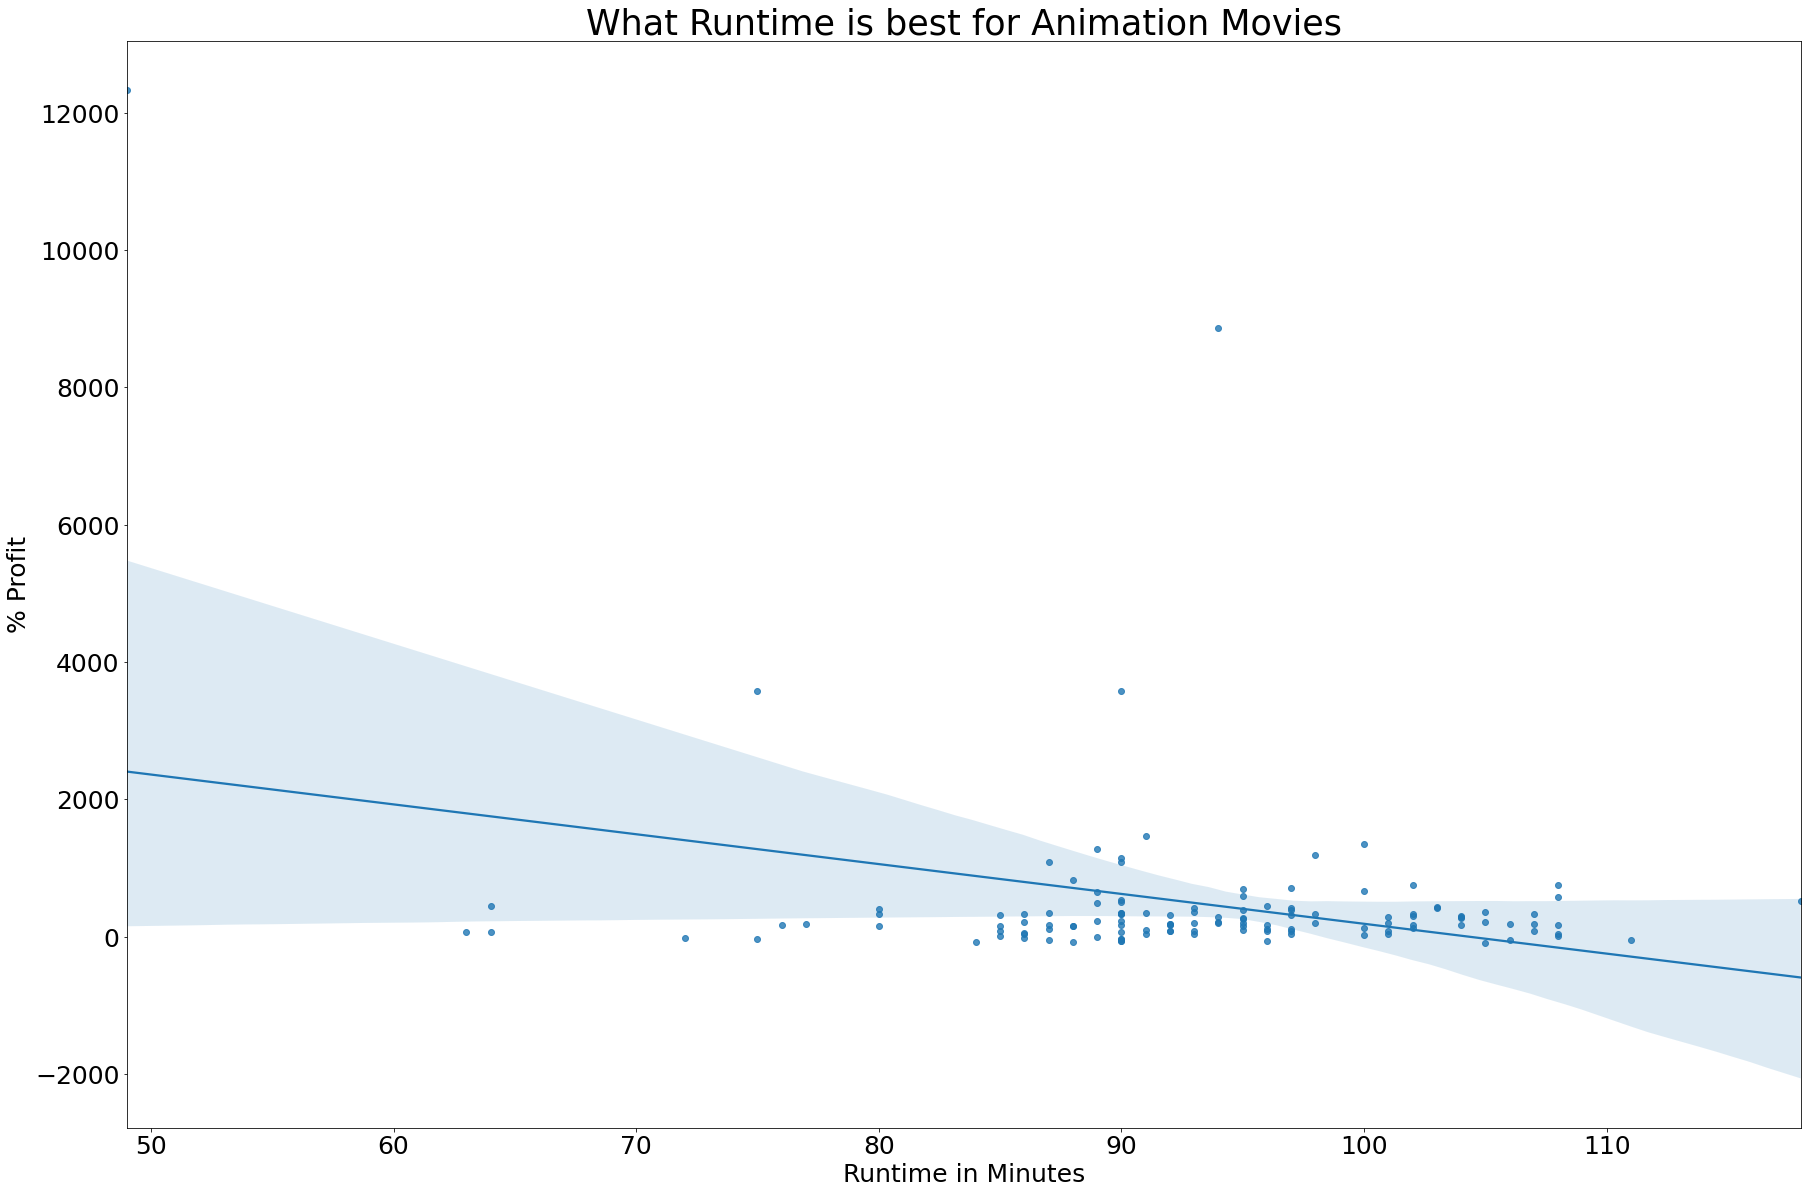

In [142]:
fig, ax = plt.subplots(figsize = (30,20))
df3_filtered = df3.loc[(df3['profit_as_percentage'] <= 15000) & (df3['runtime_minutes'] >= 45) & (df3['unique_genres'] == 'Animation')]
ax = sns.regplot(x = 'runtime_minutes', y = 'profit_as_percentage', data = df3_filtered)
plt.title("What Runtime is best for Animation Movies", fontsize = 35)
plt.ylabel("% Profit", fontsize = 25) 
plt.xlabel("Runtime in Minutes", fontsize = 25)

ax.tick_params(axis = 'y', labelsize = 25)
ax.tick_params(axis = 'x', labelsize = 25)


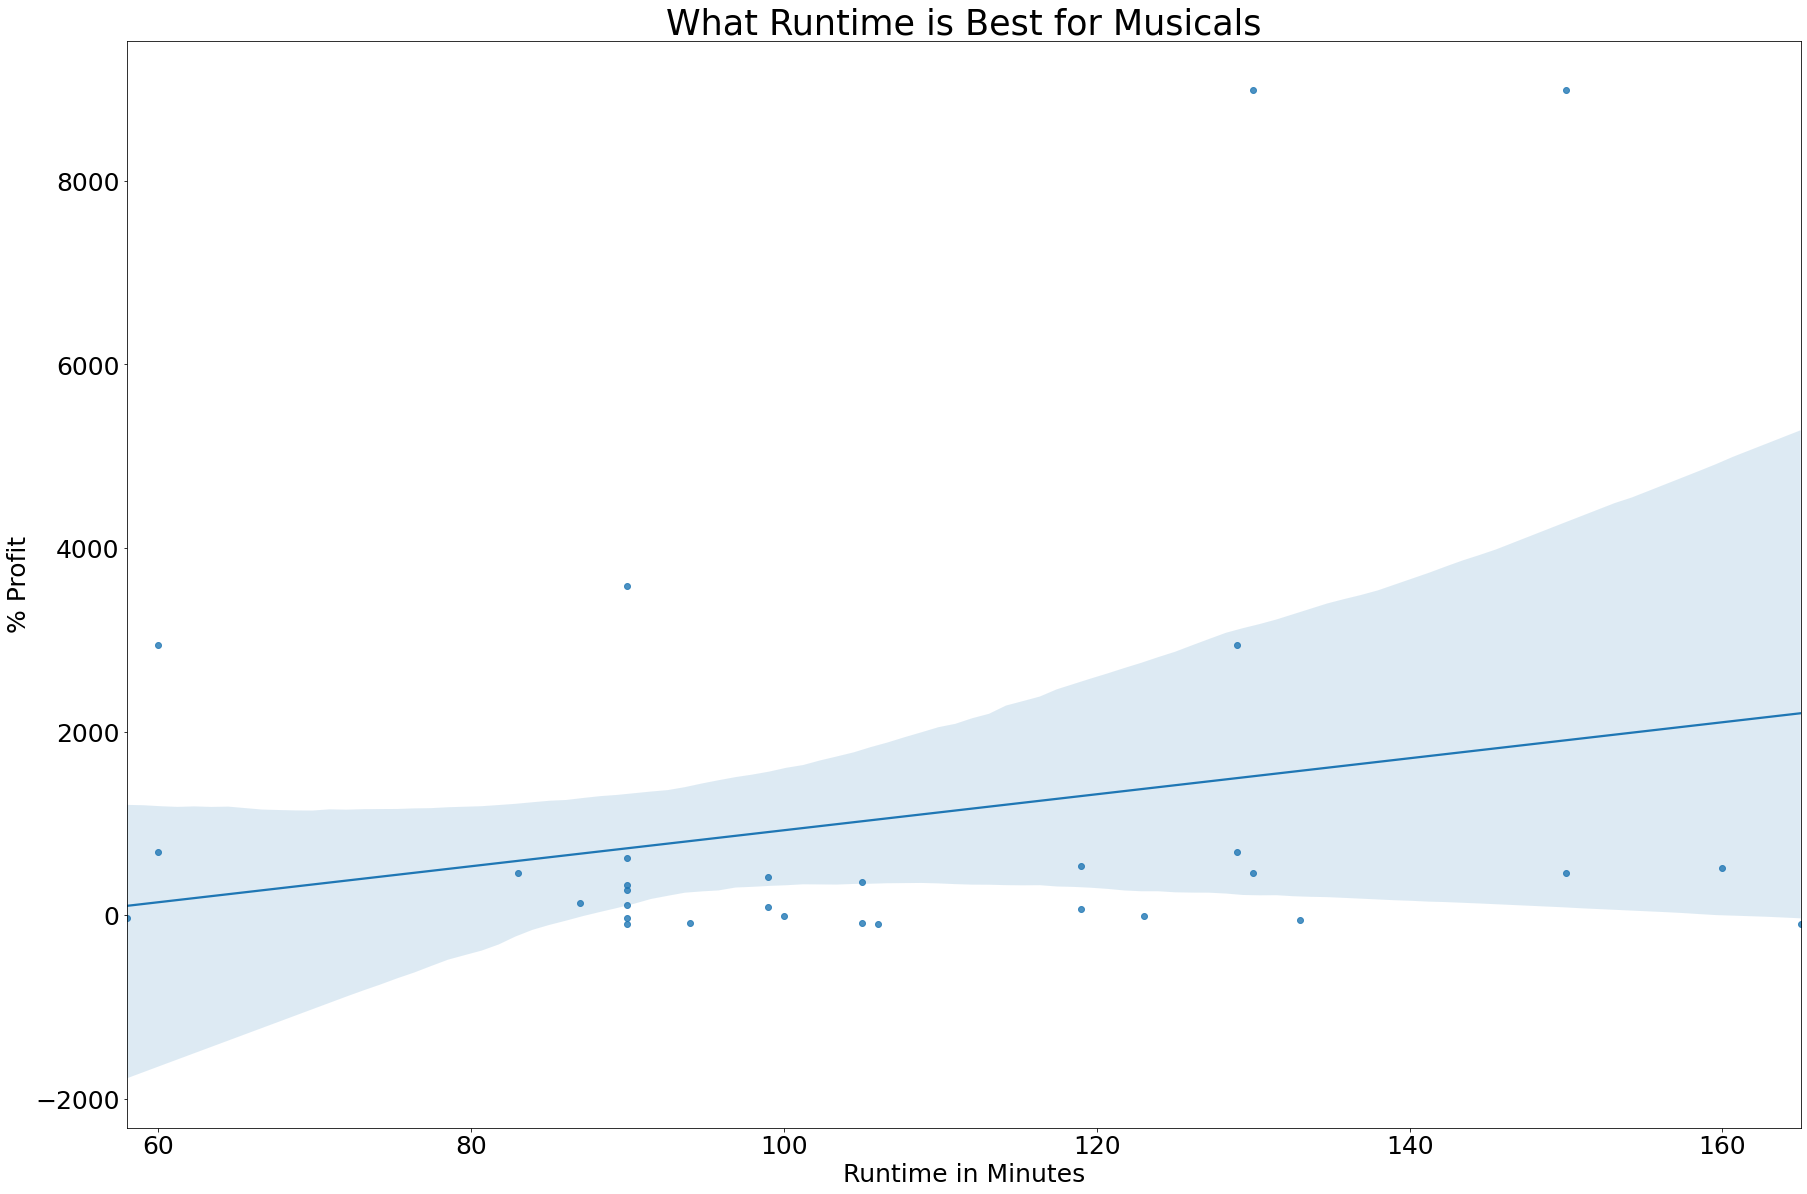

In [143]:
fig, ax = plt.subplots(figsize = (30,20))
df3_filtered = df3.loc[(df3['profit_as_percentage'] <= 15000) & (df3['runtime_minutes'] >= 45) & (df3['unique_genres'] == 'Musical')]
ax = sns.regplot(x = 'runtime_minutes', y = 'profit_as_percentage', data = df3_filtered)
plt.title("What Runtime is Best for Musicals", fontsize = 35)
plt.ylabel("% Profit", fontsize = 25) 
plt.xlabel("Runtime in Minutes", fontsize = 25)

ax.tick_params(axis = 'y', labelsize = 25)
ax.tick_params(axis = 'x', labelsize = 25)